In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from pathlib import Path

from DataHandler import FeatureDataHandler
from src.FeatureHandler import FeatureHandler
from src.RecommenderSGDBatch import RecommenderSGDBatch
from src.Explainer import MovieFeatureRegressionExplainer


%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

FIGURE_PATH= Path('/media/sf_PycharmProjects_Windows/Bilder_MT')

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [82]:
data_handler = FeatureDataHandler()
feature_handler = FeatureHandler()

ratings = data_handler.load_ratings_dev()
# ratings = data_handler.load_ratings_dev()[0:500]  # use for faster test
user_features = data_handler.load_user_features_dev_raw()
movie_features = data_handler.load_movie_features_raw()

ratings = FeatureHandler.drop_ratings_where_movie_no_genome_tag(ratings, data_handler.load_movie_features())
ratings = ratings.sample(frac=1)  # shuffle
X = ratings.loc[:, ['userId', 'movieId']]
y = ratings['rating']

user_features = user_features.dropna()
movie_features = movie_features.dropna()
avg_user_rating = user_features['user_avg_rating']
user_features.drop(labels=['user_avg_rating'], axis=1, inplace=True)




model = data_handler.load_model('SGDBatchRegressor_subset.joblib')
feature_handler_fitted = model.feature_handler
movie_features = feature_handler_fitted.movie_features
user_features = feature_handler_fitted.user_features

feature_names = FeatureHandler.replace_feature_descriptions(movie_features.columns.tolist(), data_handler)

## Bewertungen

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


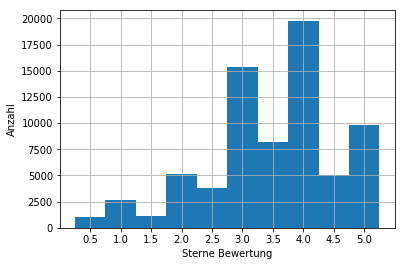

<Figure size 432x288 with 0 Axes>

In [72]:
plt.clf()
#Histogram for ratings
bins=np.arange(0.5,6,0.5)

plt.hist(ratings['rating'], align='left', bins=bins)

plt.ylabel("Anzahl")
plt.xlabel('Sterne Bewertung')


plt.xticks(bins[:-1])
plt.grid(b=True)


plt.savefig( FIGURE_PATH / 'ratings_histogram.png')
plt.show()
plt.clf()

In [88]:
ratings['rating'].describe().values.astype(object)

array([71932.0, 3.481267029972752, 1.0630830908082065, 0.5, 3.0, 3.5, 4.0,
       5.0], dtype=object)

In [19]:
np.sort(ratings['rating'].unique())

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [24]:
ratings.describe()

userId    movieId    rating      timestamp
count  71932.000  71932.000 71932.000      71932.000
mean   62891.212   8067.412     3.481 1099198585.382
std    39618.880  17833.435     1.063  158890129.202
min      761.000      1.000     0.500  828049421.000
25%    32445.000    788.000     3.000  966658824.000
50%    54060.000   2080.000     3.500 1108122871.500
75%    98095.000   4518.250     4.000 1225250578.000
max   138478.000 128488.000     5.000 1427745227.000

In [70]:
ratings.describe()['rating'].round(2).to_excel(FIGURE_PATH / 'rating_describe.xlsx')

## Film Eigenschaften



In [15]:
movie_features.columns=feature_names

In [16]:
movie_features.describe().round(2).to_excel(FIGURE_PATH / 'movie_feature.xlsx')

## Nutzer Eigenschaften

In [32]:
user_features.columns = feature_names

In [33]:
user_features.describe().round(2)

Genre: no_genres_listed  Genre: Action  Genre: Adventure  \
count                  500.000        500.000           500.000   
mean                     0.000          0.210             0.170   
std                      0.000          0.100             0.070   
min                      0.000          0.020             0.000   
25%                      0.000          0.140             0.120   
50%                      0.000          0.200             0.160   
75%                      0.000          0.270             0.210   
max                      0.000          0.670             0.510   

       Genre: Animation  Genre: Children  Genre: Comedy  Genre: Crime  \
count           500.000          500.000        500.000       500.000   
mean              0.050            0.070          0.260         0.120   
std               0.050            0.060          0.090         0.060   
min               0.000            0.000          0.060         0.000   
25%               0.020            0.030          0.200         0.080   
50%               0.040            0.050          0.250         0.110   
75%               0.060            0.090          0.310         0.150   
max               0.380            0.660          0.700         0.360   

       Genre: Documentary  Genre: Drama  Genre: Fantasy      ...       heftig  \
count             500.000       500.000         500.000      ...      500.000   
mean                0.010         0.310           0.080      ...        0.240   
std                 0.010         0.090           0.040      ...        0.060   
min                 0.000         0.060           0.000      ...        0.090   
25%                 0.000         0.240           0.050      ...        0.190   
50%                 0.000         0.300           0.070      ...        0.230   
75%                 0.010         0.370           0.100      ...        0.280   
max                 0.080         0.670           0.290      ...        0.480   

        Mühle  Obsession  Aktion  Feel-god  Happy End  Existentialismus  \
count 500.000    500.000 500.000   500.000    500.000           500.000   
mean    0.170      0.190   0.300     0.250      0.260             0.200   
std     0.020      0.050   0.090     0.040      0.040             0.040   
min     0.120      0.080   0.120     0.130      0.150             0.130   
25%     0.160      0.150   0.250     0.220      0.230             0.170   
50%     0.170      0.180   0.300     0.250      0.250             0.200   
75%     0.190      0.220   0.360     0.280      0.280             0.220   
max     0.270      0.390   0.620     0.410      0.440             0.350   

       Oscar (beste Nebendarstellerin)  Waffen  unterhaltsam  
count                          500.000 500.000       500.000  
mean                             0.220   0.230         0.290  
std                              0.050   0.050         0.040  
min                              0.110   0.130         0.150  
25%                              0.190   0.200         0.260  
50%                              0.220   0.230         0.290  
75%                              0.250   0.260         0.320  
max                              0.400   0.410         0.440  

[8 rows x 120 columns]

In [39]:
user_features.describe().drop('count').round(2).transpose().to_excel(FIGURE_PATH / 'user_feature.xlsx')

In [21]:
user_features = feature_handler_fitted.user_features

In [38]:
user_features.describe().drop('count').transpose()

mean   std   min   25%   50%   75%   max
Genre: no_genres_listed          0.000 0.000 0.000 0.000 0.000 0.000 0.000
Genre: Action                    0.208 0.097 0.019 0.139 0.204 0.267 0.670
Genre: Adventure                 0.170 0.075 0.000 0.120 0.161 0.211 0.514
Genre: Animation                 0.046 0.046 0.000 0.018 0.036 0.063 0.376
Genre: Children                  0.067 0.061 0.000 0.031 0.053 0.086 0.662
Genre: Comedy                    0.260 0.090 0.057 0.200 0.253 0.309 0.696
Genre: Crime                     0.119 0.057 0.000 0.082 0.114 0.149 0.355
Genre: Documentary               0.005 0.012 0.000 0.000 0.000 0.006 0.084
Genre: Drama                     0.307 0.093 0.056 0.243 0.300 0.372 0.674
Genre: Fantasy                   0.075 0.045 0.000 0.046 0.070 0.096 0.291
Genre: Film-Noir                 0.006 0.014 0.000 0.000 0.000 0.007 0.170
Genre: Horror                    0.044 0.044 0.000 0.017 0.034 0.059 0.300
Genre: IMAX                      0.020 0.026 0.000 0.000 0.011 0.028 0.217
Genre: Musical                   0.033 0.034 0.000 0.012 0.026 0.045 0.306
Genre: Mystery                   0.054 0.033 0.000 0.034 0.051 0.070 0.210
Genre: Romance                   0.140 0.067 0.000 0.095 0.135 0.178 0.640
Genre: Sci-Fi                    0.114 0.081 0.000 0.063 0.100 0.143 0.639
Genre: Thriller                  0.200 0.084 0.000 0.143 0.199 0.250 0.516
Genre: War                       0.037 0.027 0.000 0.020 0.033 0.050 0.165
Genre: Western                   0.015 0.017 0.000 0.000 0.011 0.021 0.133
Original                         0.544 0.034 0.433 0.524 0.544 0.564 0.636
Mentor                           0.423 0.032 0.290 0.402 0.420 0.441 0.553
tolles ende                      0.432 0.050 0.303 0.398 0.430 0.462 0.586
Dialog                           0.404 0.044 0.282 0.374 0.403 0.433 0.545
guter Soundtrack                 0.370 0.053 0.240 0.333 0.369 0.404 0.516
Katastrophe                      0.356 0.026 0.259 0.338 0.355 0.372 0.454
Storytelling                     0.388 0.064 0.240 0.341 0.383 0.426 0.573
Story                            0.400 0.048 0.224 0.368 0.398 0.433 0.591
weglaufen                        0.329 0.035 0.214 0.306 0.328 0.350 0.495
Brutalität                       0.277 0.040 0.172 0.249 0.275 0.301 0.427
...                                ...   ...   ...   ...   ...   ...   ...
Beziehungen                      0.179 0.048 0.080 0.148 0.173 0.204 0.388
unwahrscheinliche Freundschaften 0.236 0.035 0.132 0.210 0.235 0.261 0.325
reflektierend                    0.219 0.050 0.112 0.180 0.212 0.255 0.400
schöne Landschaft                0.267 0.039 0.142 0.240 0.266 0.292 0.383
Oscar (beste Schauspielerin)     0.245 0.065 0.098 0.200 0.231 0.284 0.477
erzählt                          0.249 0.061 0.109 0.205 0.243 0.292 0.464
Nacktheit (kurz)                 0.201 0.016 0.157 0.191 0.200 0.211 0.264
visuell                          0.281 0.066 0.146 0.231 0.273 0.321 0.518
Kultfilm                         0.213 0.044 0.105 0.181 0.210 0.238 0.393
ausgezeichnetes Skript           0.309 0.067 0.134 0.260 0.302 0.351 0.514
Geheimnisse                      0.242 0.040 0.115 0.215 0.243 0.271 0.339
sexy                             0.195 0.024 0.117 0.180 0.194 0.209 0.320
einsamer Held                    0.218 0.031 0.147 0.195 0.217 0.236 0.401
basierend auf einem Buch         0.226 0.037 0.129 0.202 0.226 0.246 0.350
Rache                            0.240 0.041 0.145 0.212 0.236 0.266 0.400
Trinken                          0.190 0.042 0.098 0.160 0.188 0.218 0.314
atmosphärisch                    0.238 0.059 0.119 0.195 0.231 0.273 0.443
Kultklassiker                    0.240 0.063 0.098 0.193 0.237 0.279 0.475
Handlung                         0.272 0.051 0.142 0.234 0.267 0.303 0.459
gutes Schauspielern              0.315 0.063 0.103 0.272 0.313 0.357 0.503
heftig                           0.240 0.063 0.086 0.194 0.235 0.281 0.475
Mühle                            0.173 0.022 0.125 0.158 0.

In [26]:
len(feature_names)

120

In [30]:
feature_names

['Genre: Genre: no_genres_listed',
 'Genre: Genre: Action',
 'Genre: Genre: Adventure',
 'Genre: Genre: Animation',
 'Genre: Genre: Children',
 'Genre: Genre: Comedy',
 'Genre: Genre: Crime',
 'Genre: Genre: Documentary',
 'Genre: Genre: Drama',
 'Genre: Genre: Fantasy',
 'Genre: Genre: Film-Noir',
 'Genre: Genre: Horror',
 'Genre: Genre: IMAX',
 'Genre: Genre: Musical',
 'Genre: Genre: Mystery',
 'Genre: Genre: Romance',
 'Genre: Genre: Sci-Fi',
 'Genre: Genre: Thriller',
 'Genre: Genre: War',
 'Genre: Genre: Western',
 'Genre: Original',
 'Genre: Mentor',
 'Genre: tolles ende',
 'Genre: Dialog',
 'Genre: guter Soundtrack',
 'Genre: Katastrophe',
 'Genre: Storytelling',
 'Genre: Story',
 'Genre: weglaufen',
 'Genre: Brutalität',
 'Genre: Kulturkampf',
 'Genre: Kriterium',
 'Genre: Lebensphilosophie',
 'Genre: melancholisch',
 'Genre: Pornographie',
 'Genre: Schicksal',
 'Genre: Anpassung',
 'Genre: geschwätzig',
 'Genre: Drama',
 'Genre: seltsam',
 'Genre: optisch ansprechend',
 'Genr

In [41]:
tags = data_handler.load_raw_genome_tags()

In [42]:
tags.shape


(1128, 2)

## Model

In [18]:
model = data_handler.load_model('SGDBatchRegressor_subset.joblib')

In [19]:
type(vars(model))

dict

In [20]:
model_params = vars(model)
del model_params['fit_intercept']
del model_params['verbose'] 
del model_params['warm_start'] 
del model_params['average'] 
del model_params['batch_size'] 
del model_params['feature_handler'] 
del model_params['_tol'] 
del model_params['coef_'] 
del model_params['intercept_'] 
del model_params['t_'] 
del model_params['n_iter_no_change'] 
del model_params['n_iter'] 
del model_params['max_iter'] 
del model_params['tol'] 
del model_params['_max_iter'] 

In [21]:
model_params.keys()

dict_keys(['loss', 'penalty', 'learning_rate', 'epsilon', 'alpha', 'C', 'l1_ratio', 'shuffle', 'random_state', 'eta0', 'power_t', 'early_stopping', 'validation_fraction', 'n_iter_'])

In [22]:
model_params_s = pd.Series(model_params)

In [23]:
model_params_s

loss                   squared_loss
penalty                  elasticnet
learning_rate              constant
epsilon                       0.100
alpha                         0.010
C                             1.000
l1_ratio                      0.150
shuffle                        True
random_state                   None
eta0                          0.010
power_t                       0.100
early_stopping                False
validation_fraction           0.100
n_iter_                           1
dtype: object

In [24]:
model_params_s.to_excel(FIGURE_PATH / 'final_model_params.xlsx')

## model coef

In [39]:
model = data_handler.load_model('SGDBatchRegressor_subset.joblib')

In [40]:
coef = pd.Series(model.coef_)
coef.index = feature_names
coef.sort_values(ascending=False, inplace=True)
coef = pd.concat([pd.Series(model.intercept_, index= ["intercept_regression_model"]),coef])

In [62]:
coef

intercept_regression_model         2.516
imdb top 250                       0.366
Toller Film                        0.331
gutes Schauspielern                0.287
interessant                        0.284
überraschend klug                  0.281
sozialer Kommentar                 0.274
schöne Landschaft                  0.273
Oscar (beste Regie)                0.271
Drama                              0.225
Kultklassiker                      0.223
ausgezeichnetes Skript             0.222
Oscar (beste Schauspielerin)       0.222
klug                               0.206
Großartiges Schauspielern          0.202
Kulturkampf                        0.182
Storytelling                       0.182
guter Soundtrack                   0.179
Verfolgungsjagd                    0.160
erzählt                            0.156
geschwätzig                        0.155
dramatisch                         0.151
weglaufen                          0.128
Genre: Adventure                   0.121
Kindheit        

In [69]:
sum(coef != 0) # coef not 0


63

In [63]:
coef.to_excel(FIGURE_PATH / 'final_model_coef.xlsx')

In [54]:
coef.append(pd.Series(model.intercept_, index= ["Intercept_regression_Model"]))

imdb top 250                       0.366
Toller Film                        0.331
gutes Schauspielern                0.287
interessant                        0.284
überraschend klug                  0.281
sozialer Kommentar                 0.274
schöne Landschaft                  0.273
Oscar (beste Regie)                0.271
Drama                              0.225
Kultklassiker                      0.223
ausgezeichnetes Skript             0.222
Oscar (beste Schauspielerin)       0.222
klug                               0.206
Großartiges Schauspielern          0.202
Kulturkampf                        0.182
Storytelling                       0.182
guter Soundtrack                   0.179
Verfolgungsjagd                    0.160
erzählt                            0.156
geschwätzig                        0.155
dramatisch                         0.151
weglaufen                          0.128
Genre: Adventure                   0.121
Kindheit                           0.113
Buchadaption    

## Diskussion - Genutzte Features

>> Nicht weitergeführt/ verwendet. Nutze stattdessen einfach die Statistik der tatsächlich empfohlenen Filme, da Christoph mehr an der Auswertung als am Modell interessiert scheint

In [83]:
movies = data_handler.load_movies_german()
movie_features = feature_handler_fitted.movie_features

top_50_movies = data_handler.get_most_popular_movies(n=50)
# top_50_movies = data_handler.add_movie_information(top_50_movies)

top_50_movies_features = movie_features.loc[top_50_movies.values]    
top_50_movies_features.columns = feature_names
top_50_movies_features

Genre: no_genres_listed  Genre: Action  Genre: Adventure  \
movieId                                                             
296                            0              0                 0   
356                            0              0                 0   
1                              0              0                 1   
1682                           0              0                 0   
4973                           0              0                 0   
912                            0              0                 0   
21                             0              0                 0   
6                              0              1                 0   
4963                           0              0                 0   
223                            0              0                 0   
4886                           0              0                 1   
5445                           0              1                 0   
161                            0              0                 0   
457                            0              0                 0   
288                            0              1                 0   
778                            0              0                 0   
6377                           0              0                 1   
919                            0              0                 1   
1258                           0              0                 0   
5349                           0              1                 1   
2918                           0              0                 0   
2329                           0              0                 0   
2706                           0              0                 0   
750                            0              0                 0   
150                            0              0                 1   
339                            0              0                 0   
1208                           0              1                 0   
3114                           0              0                 1   
7361                           0              0                 0   
1393                           0              0                 0   
2                              0              0                 1   
1387                           0              1                 0   
95                             0              1                 1   
1517                           0              1                 1   
141                            0              0                 0   
780                            0              1                 1   
4995                           0              0                 0   
1222                           0              0                 0   
1307                           0              0                 0   
6874                           0              1                 0   
2987                           0              0                 1   
1784                           0              0                 0   
25                             0              0                 0   
2291                           0              0                 0   
1610                           0              1                 1   
2115                           0              1                 1   
50                             0              0                 0   
1968                           0              0                 0   
1917                           0              1                 0   
3147                           0              0                 0   

         Genre: Animation  Genre: Children  Genre: Comedy  Genre: Crime  \
movieId                                                                   
296                     0                0              1             1   
356                     0                0              1             0   
1                       1                1              1             0   
1682                    0                0   

In [84]:
model = data_handler.load_model('SGDBatchRegressor_subset.joblib')
coef = pd.Series(model.coef_)
coef.index = feature_names
coef.sort_values(ascending=False, inplace=True)
coef = coef[coef != 0]

In [88]:
test = top_50_movies_features[coef.index.values]

In [74]:
feature_names = FeatureHandler.replace_feature_descriptions(top_50_movies_features.columns.tolist(), data_handler)

In [103]:
test.shape

(50, 65)

In [89]:
test.columns.nunique()

61

In [93]:
test.columns[test.columns.duplicated()]

Index(['heftig', 'heftig', 'heftig', 'Rache'], dtype='object')

In [96]:
test['heftig']

heftig  heftig  heftig  heftig
movieId                                
296       0.568   0.975   0.568   0.975
356       0.614   0.187   0.614   0.187
1         0.493   0.192   0.493   0.192
1682      0.588   0.212   0.588   0.212
4973      0.418   0.224   0.418   0.224
912       0.366   0.123   0.366   0.123
21        0.406   0.706   0.406   0.706
6         0.859   0.858   0.859   0.858
4963      0.585   0.178   0.585   0.178
223       0.434   0.513   0.434   0.513
4886      0.374   0.154   0.374   0.154
5445      0.792   0.317   0.792   0.317
161       0.849   0.117   0.849   0.117
457       0.877   0.436   0.877   0.436
288       0.543   0.991   0.543   0.991
778       0.720   0.927   0.720   0.927
6377      0.518   0.191   0.518   0.191
919       0.197   0.086   0.197   0.086
1258      0.667   0.844   0.667   0.844
5349      0.654   0.480   0.654   0.480
2918      0.553   0.432   0.553   0.432
2329      0.921   0.947   0.921   0.947
2706      0.457   0.289   0.457   0.289
750       0.384   0.447   0.384   0.447
150       0.677   0.081   0.677   0.081
339       0.140   0.061   0.140   0.061
1208      0.742   0.888   0.742   0.888
3114      0.317   0.151   0.317   0.151
7361      0.586   0.267   0.586   0.267
1393      0.483   0.138   0.483   0.138
2         0.337   0.133   0.337   0.133
1387      0.847   0.651   0.847   0.651
95        0.354   0.209   0.354   0.209
1517      0.347   0.199   0.347   0.199
141       0.193   0.117   0.193   0.117
780       0.600   0.137   0.600   0.137
4995      0.748   0.232   0.748   0.232
1222      0.864   0.862   0.864   0.862
1307      0.328   0.094   0.328   0.094
6874      0.790   0.992   0.790   0.992
2987      0.392   0.478   0.392   0.478
1784      0.587   0.199   0.587   0.199
25        0.651   0.648   0.651   0.648
2291      0.288   0.245   0.288   0.245
1610      0.880   0.340   0.880   0.340
2115      0.708   0.766   0.708   0.766
50        0.715   0.706   0.715   0.706
1968      0.494   0.349   0.494   0.349
1917      0.516   0.123   0.516   0.123
3147      0.805   0.431   0.805   0.431

In [99]:
movie_features.columns = feature_names
movie_features['heftig']

heftig  heftig
movieId                
1         0.493   0.192
2         0.337   0.133
3         0.169   0.104
4         0.158   0.090
5         0.157   0.085
6         0.859   0.858
7         0.194   0.072
8         0.130   0.060
9         0.286   0.169
10        0.302   0.120
11        0.274   0.072
12        0.147   0.141
13        0.117   0.086
14        0.617   0.234
15        0.205   0.093
16        0.753   0.980
17        0.185   0.095
18        0.201   0.285
19        0.211   0.175
20        0.315   0.158
21        0.406   0.706
22        0.682   0.270
23        0.199   0.163
24        0.261   0.113
25        0.651   0.648
26        0.398   0.281
27        0.114   0.098
28        0.134   0.076
29        0.361   0.229
30        0.153   0.329
...         ...     ...
127323    0.176   0.303
128488    0.199   0.706
128520    0.075   0.050
128542    0.094   0.307
128604    0.107   0.113
128671    0.306   0.705
128832    0.292   0.519
128975    0.181   0.282
129354    0.265   0.132
129370    0.125   0.179
129428    0.105   0.072
129657    0.342   0.185
129659    0.218   0.071
129707    0.167   0.122
129737    0.150   0.148
129779    0.131   0.209
129781    0.117   0.032
129937    0.507   0.705
130052    0.226   0.339
130073    0.130   0.079
130075    0.202   0.113
130087    0.124   0.239
130490    0.283   0.096
130496    0.236   0.369
130520    0.145   0.114
130578    0.185   0.185
130840    0.255   0.149
131013    0.172   0.197
131168    0.254   0.380
131170    0.565   0.208

[10381 rows x 2 columns]

In [102]:
feature_names


['Genre: no_genres_listed',
 'Genre: Action',
 'Genre: Adventure',
 'Genre: Animation',
 'Genre: Children',
 'Genre: Comedy',
 'Genre: Crime',
 'Genre: Documentary',
 'Genre: Drama',
 'Genre: Fantasy',
 'Genre: Film-Noir',
 'Genre: Horror',
 'Genre: IMAX',
 'Genre: Musical',
 'Genre: Mystery',
 'Genre: Romance',
 'Genre: Sci-Fi',
 'Genre: Thriller',
 'Genre: War',
 'Genre: Western',
 'Original',
 'Mentor',
 'tolles ende',
 'Dialog',
 'guter Soundtrack',
 'Katastrophe',
 'Storytelling',
 'Story',
 'weglaufen',
 'Brutalität',
 'Kulturkampf',
 'Kriterium',
 'Lebensphilosophie',
 'melancholisch',
 'Pornographie',
 'Schicksal',
 'Anpassung',
 'geschwätzig',
 'Drama',
 'seltsam',
 'optisch ansprechend',
 'Erlösung',
 'pg-13',
 'vorhersagbar',
 'Kinematographie',
 'Großartiges Schauspielern',
 'Verfolgungsjagd',
 'Gier',
 'Rache',
 'lustiger Film',
 'sozialer Kommentar',
 'klug',
 'imdb top 250',
 'rätselhaft',
 'Spannung',
 'Kindheit',
 'Buchadaption',
 'überraschend klug',
 'hart',
 'Fantas